In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [3]:
random_state = 2020

train_df = pd.read_csv('../data/intermediate/06162020_train.csv')
val_df = pd.read_csv('../data/intermediate/06162020_val.csv')
test_df = pd.read_csv('../data/intermediate/06162020_test.csv')

train_df.set_index('patientunitstayid', inplace=True)
val_df.set_index('patientunitstayid', inplace=True)
test_df.set_index('patientunitstayid', inplace=True)

In [6]:
# Method 1 median imputation
train_df_med = train_df.fillna(train_df.median())
val_df_med = val_df.fillna(val_df.median())
test_df_med = test_df.fillna(test_df.median())

In [11]:
X_train = train_df_med.drop(columns=['aki_label']).values
print(X_train.shape)
y_train = train_df_med.aki_label.values

X_val = val_df_med.drop(columns=['aki_label']).values
print(X_val.shape)
y_val = val_df_med.aki_label.values

X_test = test_df_med.drop(columns=['aki_label']).values
print(X_test.shape)
y_test = test_df_med.aki_label.values

print(round(y_train.sum()/len(y_train), 4))
print(round(y_val.sum()/len(y_val), 4))
print(round(y_test.sum()/len(y_test), 4))

(28543, 294)
(9488, 294)
(9499, 294)
0.0442
0.0445
0.0471


In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

max_depths = [12, 25, 50, 100]
n_estimatorss = [50, 100, 200, 400]

tested_params = {'max_depth': [],
                 'n_estimators': [],
                 'roc_train' : [],
                 'roc_val': [],
                 'aveprcscore_train':[],      
                 'aveprcscore_val':[]}

for md in max_depths:
    for ne in n_estimatorss:
        rf = RandomForestClassifier(random_state=2020, class_weight='balanced', max_depth=md,\
                                   n_estimators=ne)
        tested_params['max_depth'].append(md)
        tested_params['n_estimators'].append(ne)
        rf.fit(X_train, y_train)
        print('training complete')
        y_pred_train = rf.predict_proba(X_train)[:,1]
        y_pred_val = rf.predict_proba(X_val)[:,1]
        roc_train = roc_auc_score(y_train, y_pred_train)
        roc_val = roc_auc_score(y_val, y_pred_val)
        aveprcscore_train =  average_precision_score(y_train, y_pred_train)
        aveprcscore_val =  average_precision_score(y_val, y_pred_val)
        tested_params['roc_train'].append(roc_train)
        tested_params['roc_val'].append(roc_val)
        tested_params['aveprcscore_train'].append(aveprcscore_train)
        tested_params['aveprcscore_val'].append(aveprcscore_val)

training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete


In [25]:
score_results = pd.DataFrame(tested_params)
score_results

,max_depth,n_estimators,roc_train,roc_val,aveprcscore_train,aveprcscore_val
0,12,50,0.992556,0.872491,0.919462,0.287896
1,12,100,0.993124,0.877618,0.926239,0.294662
2,12,200,0.993195,0.881967,0.929102,0.306468
3,12,400,0.993555,0.882542,0.933244,0.311992
4,25,50,1.000000,0.876510,0.999999,0.324736
5,25,100,1.000000,0.884782,1.000000,0.343577
6,25,200,1.000000,0.889783,1.000000,0.351512
7,25,400,1.000000,0.894827,1.000000,0.356732
8,50,50,1.000000,0.866469,1.000000,0.329402
9,50,100,1.000000,0.885257,1.000000,0.352666


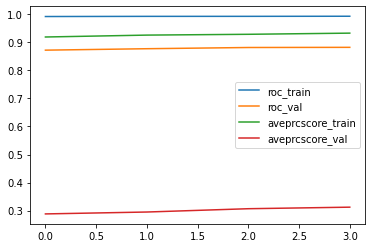

In [28]:
score_results[['roc_train', 'roc_val', 'aveprcscore_train', 'aveprcscore_val']].iloc[0:4].plot()

In [30]:
# save cleaned datasets with median interpolation in the final folder
train_df_med.to_csv('../data/final/06162020_train_med.csv')
val_df_med.to_csv('../data/final/06162020_val_med.csv')
test_df_med.to_csv('../data/final/06162020_test_med.csv')

#### n_estimators int, default=100
The number of trees in the forest.

#### criterion{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

#### max_depth int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

#### min_samples_leaf int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

#### min_weight_fraction_leaf float, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

#### max_features {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

#### max_leaf_nodes int, default=None
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

#### min_impurity_decrease float, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:

N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.
N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

#### bootstrap bool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

#### oob_scorebool, default=False
Whether to use out-of-bag samples to estimate the generalization accuracy.

#### class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

#### ccp_alpha non-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

#### max_samples int or float, default=None
If bootstrap is True, the number of samples to draw from X to train each base estimator.

#### Defaults
n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None

In [66]:
def train_plot(param_vals, parameter, X_train, y_train, X_val, y_val):
    scores = {
             parameter : param_vals,
             'roc_train' : [],
             'roc_val': [],
             'aveprcscore_train':[],      
             'aveprcscore_val':[]}
    for param in param_vals:
        rf = RandomForestClassifier()
        param_dict = {parameter:param, 'random_state':random_state}
        rf.set_params(**param_dict)
        rf.fit(X_train, y_train)
        print('training complete')
        y_pred_train = rf.predict_proba(X_train)[:,1]
        y_pred_val = rf.predict_proba(X_val)[:,1]
        roc_train = roc_auc_score(y_train, y_pred_train)
        roc_val = roc_auc_score(y_val, y_pred_val)
        aveprcscore_train =  average_precision_score(y_train, y_pred_train)
        aveprcscore_val =  average_precision_score(y_val, y_pred_val)
        scores['roc_train'].append(roc_train)
        scores['roc_val'].append(roc_val)
        scores['aveprcscore_train'].append(aveprcscore_train)
        scores['aveprcscore_val'].append(aveprcscore_val)
    scores_df = pd.DataFrame(scores)
    scores_df.set_index(parameter, inplace=True)
    scores_df.plot()
    plt.show()
    return scores

training complete
training complete
training complete
training complete
training complete
training complete


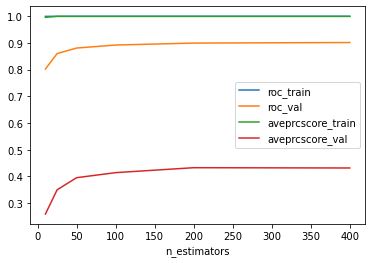

In [67]:
# try to get a feel for each parameter
n_estimators = [10, 25, 50, 100, 200, 400]
n_est_score = train_plot(n_estimators, 'n_estimators', X_train, y_train, X_val, y_val)

training complete
training complete


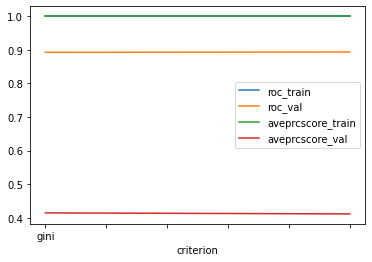

In [68]:
criterion = ['gini', 'entropy']
criterion_score = train_plot(criterion, 'criterion', X_train, y_train, X_val, y_val)

In [69]:
criterion_score

{'criterion': ['gini', 'entropy'],
 'roc_train': [1.0, 1.0],
 'roc_val': [0.892432195495278, 0.8933915896380729],
 'aveprcscore_train': [1.0, 1.0],
 'aveprcscore_val': [0.41425287363560764, 0.4111653930860972]}

training complete
training complete
training complete
training complete
training complete
training complete


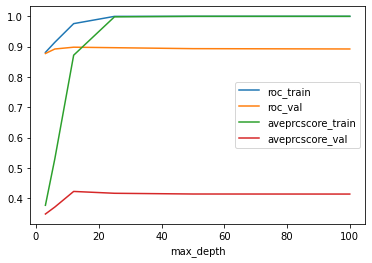

In [70]:
max_depth = [3, 6, 12, 25, 50, 100]
max_depth_score = train_plot(max_depth, 'max_depth', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete
training complete


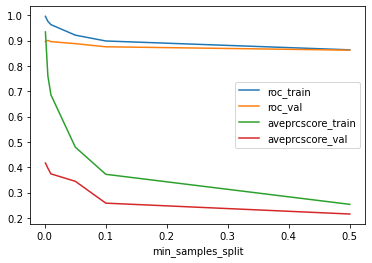

In [85]:
min_samples_split = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
min_samples_split_score = train_plot(min_samples_split, 'min_samples_split', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete
training complete


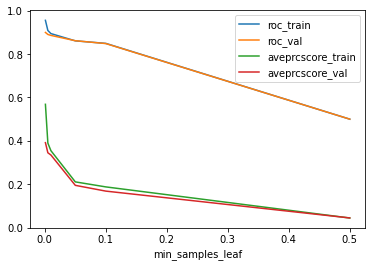

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

In [72]:
min_samples_leaf = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
min_samples_leaf_score = train_plot(min_samples_leaf, 'min_samples_leaf', X_train, y_train, X_val, y_val)
min_samples_leaf

training complete
training complete
training complete
training complete
training complete
training complete
training complete


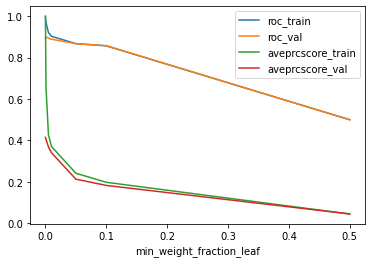

In [73]:
min_weight_fraction_leaf = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
min_weight_fraction_leaf = train_plot(min_weight_fraction_leaf, 'min_weight_fraction_leaf', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete
training complete


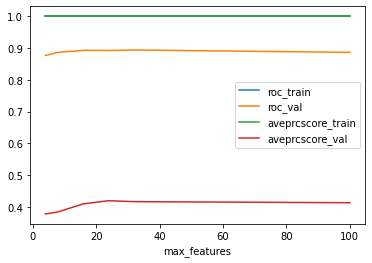

In [76]:
max_features =  [4, 8, 16, 24, 32, 100]
max_features_score = train_plot(max_features, 'max_features', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete


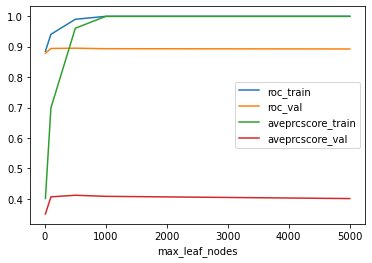

In [77]:
max_leaf_nodes = [10, 100, 500, 1000, 5000]
max_leaf_nodes_score = train_plot(max_leaf_nodes, 'max_leaf_nodes', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete
training complete
training complete


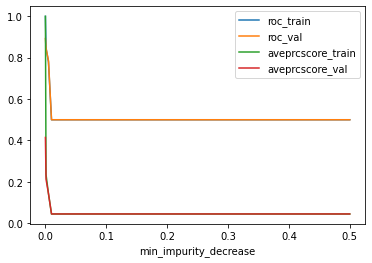

In [78]:
min_impurity_decrease = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
min_impurity_decrease_score = train_plot(min_impurity_decrease, 'min_impurity_decrease', X_train, y_train, X_val, y_val)

training complete
training complete


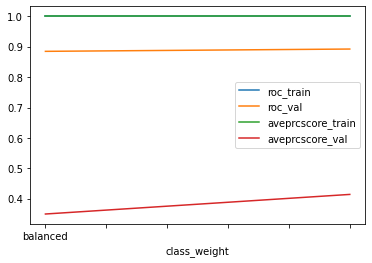

In [79]:
class_weight = ["balanced", None]
class_weight_score = train_plot(class_weight, 'class_weight', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete
training complete
training complete


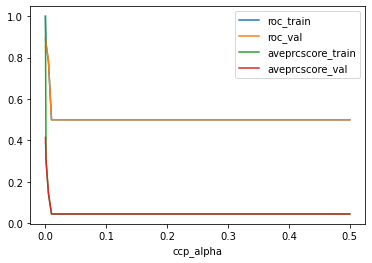

In [80]:
ccp_alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5 ]
ccp_alpha_score = train_plot(ccp_alpha, 'ccp_alpha', X_train, y_train, X_val, y_val)

training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete


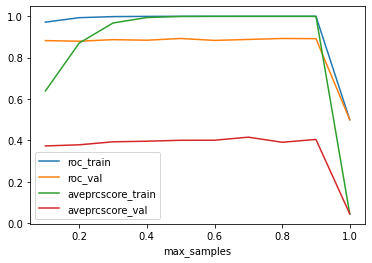

In [82]:
max_samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_samples_score = train_plot(max_samples, 'max_samples', X_train, y_train, X_val, y_val)

[[9052    0]
 [ 445    2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9052
           1       1.00      0.00      0.01       447

    accuracy                           0.95      9499
   macro avg       0.98      0.50      0.49      9499
weighted avg       0.96      0.95      0.93      9499



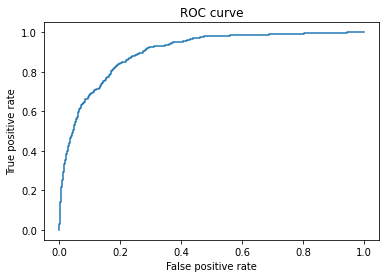

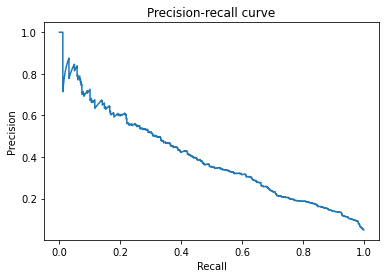

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

params = {'n_estimators':100, 'max_depth':12, 'min_samples_split':0.001, \
          'min_samples_leaf':0.001, 'max_features':24, 'max_leaf_nodes':100, \
          'random_state':random_state, 'max_samples':0.7}

rf = RandomForestClassifier()
rf.set_params(**params)

#Combine train and val sets
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val), axis=0)

rf.fit(X_train_val, y_train_val)

y_score = rf.predict(X_test)
y_pred = rf.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_score))
print(classification_report(y_test, y_score))
fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [89]:
np.where(recall>0.5)

(array([   0,    1,    2, ..., 8368, 8369, 8370]),)

In [90]:
pr_th[8370]

0.15883510634028877

In [92]:
y_pred_0159 = y_pred>0.159
y_pred_0159 = y_pred_0159.astype(int)
print(confusion_matrix(y_test, y_pred_0159))
print(classification_report(y_test, y_pred_0159))

[[8646  406]
 [ 225  222]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      9052
           1       0.35      0.50      0.41       447

    accuracy                           0.93      9499
   macro avg       0.66      0.73      0.69      9499
weighted avg       0.95      0.93      0.94      9499



[[9047    5]
 [ 414   33]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9052
           1       0.87      0.07      0.14       447

    accuracy                           0.96      9499
   macro avg       0.91      0.54      0.56      9499
weighted avg       0.95      0.96      0.94      9499



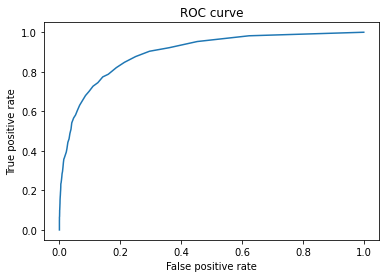

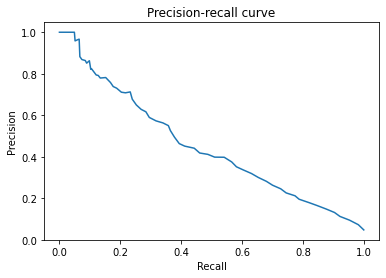

In [93]:
rf_notune = RandomForestClassifier(random_state=random_state)

rf_notune.fit(X_train_val, y_train_val)

y_score_nt = rf_notune.predict(X_test)
y_pred_nt = rf_notune.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_score_nt))
print(classification_report(y_test, y_score_nt))
fpr_nt, tpr_nt, auc_th_nt = roc_curve(y_test, y_pred_nt)
precision_nt, recall_nt, pr_th_nt = precision_recall_curve(y_test, y_pred_nt)

plt.plot(fpr_nt, tpr_nt)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall_nt, precision_nt)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [94]:
np.where(recall_nt>0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),)

In [95]:
pr_th_nt[20]

0.2

In [98]:
y_pred_02 = y_pred_nt>=0.2
y_pred_02 = y_pred_02.astype(int)
print(confusion_matrix(y_test, y_pred_02))
print(classification_report(y_test, y_pred_02))

[[8707  345]
 [ 219  228]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9052
           1       0.40      0.51      0.45       447

    accuracy                           0.94      9499
   macro avg       0.69      0.74      0.71      9499
weighted avg       0.95      0.94      0.94      9499



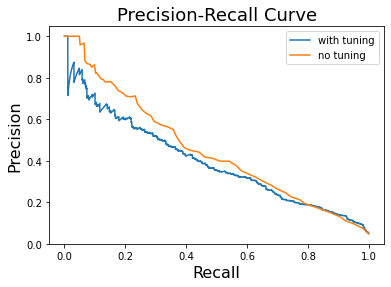

In [96]:
plt.plot(recall, precision, label='with tuning')
plt.plot(recall_nt, precision_nt, label='no tuning')
plt.legend()
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=18)
plt.show()

In [99]:
rf_notune

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

In [101]:
feat_df = pd.DataFrame({'Features' : train_df_med.drop(columns=['aki_label']).columns, \
                       'Importance' : rf_notune.feature_importances_})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)
feat_df

,Features,Importance
34,max_result_creatinine,0.044975
19,min_result_creatinine,0.037736
49,delta_result_creatinine,0.026280
24,max_result_BUN,0.024004
157,Performed,0.022105
...,...,...
135,FVC 31-40,0.000000
137,FVC 51-60,0.000000
145,MAT,0.000000
139,FVC 71-80,0.000000


Text(0.5, 1.0, 'Pearson correlation coefficient between numerical features')

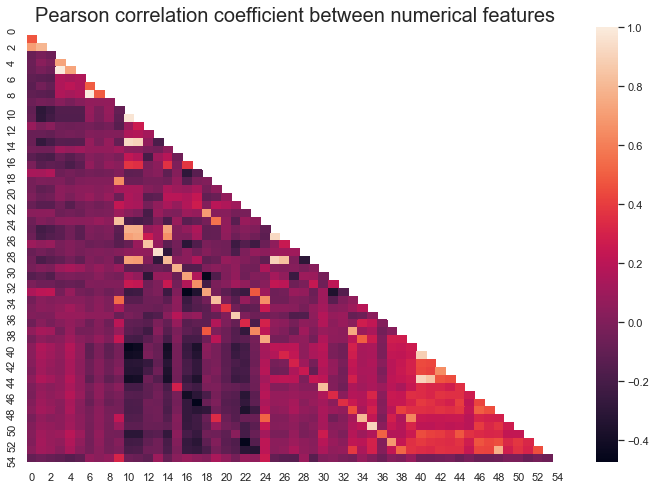

In [111]:
import seaborn as sns
num_feat = ['min_sao2',
 'max_sao2',
 'mean_sao2',
 'min_heartrate',
 'max_heartrate',
 'mean_heartrate',
 'min_respiration',
 'max_respiration',
 'mean_respiration',
 'min_result_BUN',
 'min_result_Hct',
 'min_result_Hgb',
 'min_result_MCHC',
 'min_result_MCV',
 'min_result_RBC',
 'min_result_WBC x 1000',
 'min_result_bicarbonate',
 'min_result_calcium',
 'min_result_chloride',
 'min_result_creatinine',
 'min_result_glucose',
 'min_result_platelets x 1000',
 'min_result_potassium',
 'min_result_sodium',
 'max_result_BUN',
 'max_result_Hct',
 'max_result_Hgb',
 'max_result_MCHC',
 'max_result_MCV',
 'max_result_RBC',
 'max_result_WBC x 1000',
 'max_result_bicarbonate',
 'max_result_calcium',
 'max_result_chloride',
 'max_result_creatinine',
 'max_result_glucose',
 'max_result_platelets x 1000',
 'max_result_potassium',
 'max_result_sodium',
 'delta_result_BUN',
 'delta_result_Hct',
 'delta_result_Hgb',
 'delta_result_MCHC',
 'delta_result_MCV',
 'delta_result_RBC',
 'delta_result_WBC x 1000',
 'delta_result_bicarbonate',
 'delta_result_calcium',
 'delta_result_chloride',
 'delta_result_creatinine',
 'delta_result_glucose',
 'delta_result_platelets x 1000',
 'delta_result_potassium',
 'delta_result_sodium',
 'age']

# Calculate Pearson correlation coefficient
num_df = train_df_med[num_feat]
num_corr_mat = np.corrcoef(num_df.values, rowvar=False)

mask = np.triu(np.ones_like(num_corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(num_corr_mat, annot=False, mask=mask)
ax.set_title("Pearson correlation coefficient between numerical features", fontsize=20)

In [112]:
from itertools import compress

# Define a function for generating the array and dictionary with correlated columns
def corr_extractor(corr_mat, cols_list, thresh):
    """With correlation matrix, list of columns (for which the 
    correlation matrix was calculated), and threshold (for 
    cooefficient comparison) as input return an array of 
    redundant column (to drop) and a dictionary to inspect 
    the correlations."""
    corr_mat_asym = np.tril(corr_mat, -1) # set the top half triangle of the matrix (including main diagonal) to 0
    bool_mask = abs(corr_mat_asym)>=thresh # create a boolean mask for values above the threshold

    corr_array = [] # initiate empty array and dictionary
    corr_dict = {}
    
    for i in range(len(cols_list)): 
        # iterate through the columns in cols_array and extract the associated column names with the boolean mask
        cors = list(compress(cols_list, bool_mask[:,i]))
        if cors!= []:
            corr_dict[cols_list[i]]=[]
            # create a key value pair, key= (query) column name values = list of associated columns
            corr_dict[cols_list[i]]+=cors
            for elem in cors:
                corr_array.append(elem) # create a list only with the redundant column (excluding the query)
    
    corr_array = list(dict.fromkeys(corr_array)) # drop duplicates
    
    return corr_array, corr_dict

In [113]:
#determine the numerical features that have a Pearson correlation coeffient above 0.90
num_corr_to_drop, num_corr_dict = corr_extractor(num_corr_mat, num_feat, 0.90)
print("The number of redundant numerical features is ", len(num_corr_to_drop))
print("The number of remaining numerical features is ", len(num_feat)-len(num_corr_to_drop))

The number of redundant numerical features is  8
The number of remaining numerical features is  47


In [114]:
num_corr_to_drop

['mean_heartrate',
 'mean_respiration',
 'min_result_Hgb',
 'min_result_RBC',
 'max_result_MCV',
 'max_result_Hgb',
 'delta_result_glucose',
 'delta_result_RBC']

/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Pearson correlation coefficient between categorical features')

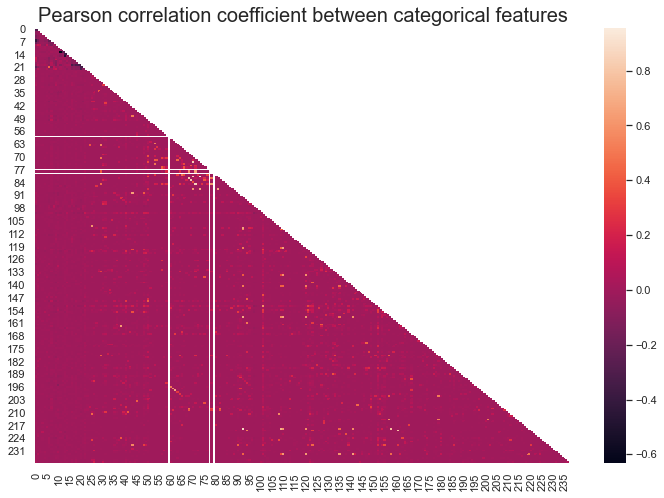

In [115]:
cat_feat = ['organsys_Cardiovascular',
 'organsys_Gastrointestinal',
 'organsys_Genitourinary',
 'organsys_Hematology',
 'organsys_Metabolic/Endocrine',
 'organsys_Musculoskeletal/Skin',
 'organsys_Neurologic',
 'organsys_Respiratory',
 'organsys_Trauma',
 'from_or_Yes',
 'gender_Female',
 'ethnicity_African American',
 'ethnicity_Asian',
 'ethnicity_Caucasian',
 'ethnicity_Hispanic',
 'ethnicity_Other/Unknown',
 'unittype_CCU-CTICU',
 'unittype_CSICU',
 'unittype_Cardiac ICU',
 'unittype_MICU',
 'unittype_Med-Surg ICU',
 'unittype_Neuro ICU',
 'unittype_SICU',
 '>= 20 mg prednisone per day or equivalent',
 'A paced',
 'A/V paced',
 'AICD',
 'AIDS',
 'ALL',
 'AML',
 'AR',
 'AS',
 'Alkylating agents (bleomycin, cytoxan, cyclophos.)',
 'Anthracyclines (adriamycin, daunorubicin)',
 'BMT within past 12 mos.',
 'CABG - date unknown',
 'CABG - remote',
 'CABG - within 2 years',
 'CABG - within 5 years',
 'CABG - within 6 months',
 'CHF',
 'CHF - class I',
 'CHF - class II',
 'CHF - class III',
 'CHF - class IV',
 'CHF - severity unknown',
 'CLL',
 'CML',
 'COPD  - moderate',
 'COPD  - no limitations',
 'COPD  - severe',
 'Cis-platinum',
 "Cushing's syndrome",
 'DLCO 31-40',
 'DLCO 41-50',
 'DLCO 51-60',
 'DLCO 61-70',
 'DLCO 71-80',
 'DLCO <30',
 'DLCO >80',
 'DVT - date unknown',
 'DVT - remote',
 'DVT - within 2 years',
 'DVT - within 5 years',
 'DVT - within 6 months',
 'FEV1 31-40',
 'FEV1 41-50',
 'FEV1 51-60',
 'FEV1 61-70',
 'FEV1 71-80',
 'FEV1 <30',
 'FEV1 >80',
 'FEV1/FVC ratio 31-40',
 'FEV1/FVC ratio 41-50',
 'FEV1/FVC ratio 51-60',
 'FEV1/FVC ratio 61-70',
 'FEV1/FVC ratio 71-80',
 'FEV1/FVC ratio <30',
 'FEV1/FVC ratio >80',
 'FVC 31-40',
 'FVC 41-50',
 'FVC 51-60',
 'FVC 61-70',
 'FVC 71-80',
 'FVC <30',
 'FVC >80',
 'HIV positive',
 'Hodgkins disease',
 'ITP',
 'MAT',
 'MI - date unknown',
 'MI - remote',
 'MI - within 2 years',
 'MI - within 5 years',
 'MI - within 6 months',
 'MR',
 'MS',
 'No Health Problems',
 'Not Obtainable',
 'Not Performed',
 'PS',
 'Performed',
 'SLE',
 'SVT- other',
 'TIA(s) - date unknown',
 'TIA(s) - remote',
 'TIA(s) - within 2 years',
 'TIA(s) - within 5 years',
 'TIA(s) - within 6 months',
 'TR',
 'UGI bleeding',
 'V paced',
 'Vincristine',
 'angina',
 'angina - class I',
 'angina - class II',
 'angina - class III',
 'angina - class IV',
 'angina - severity unknown',
 'aplastic anemia',
 'ascites',
 'asthma',
 'atrial fibrillation - chronic',
 'atrial fibrillation - intermittent',
 'bile duct',
 'biopsy proven',
 'bladder',
 'bone',
 'both prednisone and other immunosuppressive medications',
 'brain',
 'breast',
 'carcinomatosis',
 'chemotherapy within past 6 mos.',
 'chemotherapy within past mo.',
 'chronic kidney stones',
 'clinical diagnosis',
 'clotting disorder',
 'colon',
 'coma',
 'dementia',
 'dermatomyositis',
 'encephalopathy',
 'esophagus',
 'essential thrombocytosis',
 'excellent - strenuous exercise (>10 mets)',
 'focal seizures',
 'generalized seizures',
 'head and neck',
 'hemolytic anemia',
 'home oxygen',
 'hypercalcemia',
 'hypercoagulable condition',
 'hypertension requiring treatment',
 'hyperthyroidism',
 'hypothyroidism',
 'insulin dependent diabetes',
 'intra-abdominal',
 'intracranial mass',
 'jaundice',
 'kidney',
 'leukemia - other',
 'limited - household activities (1-4 mets)',
 'liver',
 'lung',
 'medication dependent',
 'melanoma',
 'moderate - stairs/brisk walking (5-10 mets)',
 'multiple',
 'multiple myeloma',
 'myelofibrosis',
 'neurogenic bladder',
 'neuromuscular disease',
 'nodes',
 'non-Hodgkins lymphoma',
 'non-medication dependent',
 'none',
 'none - bed-ridden',
 'other',
 'other hematologic malignancy',
 'other immunosuppressive medications',
 'other seizures',
 'ovary',
 'pancreas - adenocarcinoma',
 'pancreas - islet cell',
 'peptic ulcer disease',
 'peptic ulcer disease with h/o GI bleeding',
 'peripheral vascular disease',
 'petite mal seizures',
 'polycythemia vera',
 'primary site',
 'procedural coronary intervention - date unknown',
 'procedural coronary intervention - remote',
 'procedural coronary intervention - within 2 years',
 'procedural coronary intervention - within 5 years',
 'procedural coronary intervention - within 6 months',
 'prostate',
 'pulmonary embolism - date unknown',
 'pulmonary embolism - remote',
 'pulmonary embolism - within 2 years',
 'pulmonary embolism - within 5 years',
 'pulmonary embolism - within 6 months',
 'recent steroid use for > 10 days',
 'renal tubular acidosis',
 'respiratory failure - date unknown',
 'respiratory failure - remote',
 'respiratory failure - within 2 years',
 'respiratory failure - within 5 years',
 'respiratory failure - within 6 months',
 'restrictive pulmonary disease',
 'rheumatoid arthritis',
 's/p AVR',
 's/p MVR',
 's/p TVR',
 's/p heart transplant',
 's/p liver transplant',
 's/p lung transplant',
 's/p renal transplant',
 'sarcoidosis',
 'sarcoma',
 'scleroderma',
 'sick sinus syndrome',
 'sickle cell disease',
 'splenomegaly',
 'stomach',
 'stroke - date unknown',
 'stroke - remote',
 'stroke - within 2 years',
 'stroke - within 5 years',
 'stroke - within 6 months',
 'testes',
 'unknown',
 'unknown pacer',
 'uterus',
 'varices',
 'vasculitis',
 'ventricular ectopy',
 'ventricular fibrillation',
 'ventricular tachycardia']

cat_df = train_df_med[cat_feat]
cat_corr_mat = np.corrcoef(cat_df.values, rowvar=False)

mask = np.triu(np.ones_like(cat_corr_mat, dtype=np.bool))
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(cat_corr_mat, annot=False, mask=mask)
ax.set_title("Pearson correlation coefficient between categorical features", fontsize=20)

In [116]:
#determine the categorical features that have a Pearson correlation coeffient above 0.90
cat_corr_to_drop, cat_corr_dict = corr_extractor(cat_corr_mat, cat_feat, 0.90)
print("The number of redundant numerical features is ", len(cat_corr_to_drop))
print("The number of remaining numerical features is ", len(cat_feat)-len(cat_corr_to_drop))

The number of redundant numerical features is  1
The number of remaining numerical features is  237


<ipython-input-112-32ef40ba0b21>:11: RuntimeWarning: invalid value encountered in greater_equal
  bool_mask = abs(corr_mat_asym)>=thresh # create a boolean mask for values above the threshold


In [119]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(train_df_med[cat_feat], y_train, discrete_features=True)
cat_feat_df = pd.DataFrame({'Features':cat_feat, 'Mutual information score':mi})
cat_feat_df.sort_values(by='Mutual information score', ascending=False, inplace=True)
cat_feat_df

,Features,Mutual information score
101,Performed,8.502497e-03
152,hypertension requiring treatment,5.087631e-03
155,insulin dependent diabetes,1.896208e-03
164,medication dependent,1.870051e-03
154,hypothyroidism,1.535298e-03
...,...,...
11,ethnicity_African American,4.860193e-07
19,unittype_MICU,1.620263e-07
77,FEV1/FVC ratio <30,1.755540e-15
59,DLCO >80,1.755540e-15


In [132]:
cat_feat_todrop = cat_feat_df[cat_feat_df['Mutual information score']<10**-5]
cat_feat_todrop

,Features,Mutual information score
52,Cushing's syndrome,9.499233e-06
68,FEV1 61-70,9.499233e-06
150,hypercalcemia,9.499233e-06
9,from_or_Yes,9.172614e-06
119,aplastic anemia,7.930433e-06
51,Cis-platinum,7.915886e-06
81,FVC 51-60,7.915886e-06
74,FEV1/FVC ratio 51-60,7.915886e-06
33,"Anthracyclines (adriamycin, daunorubicin)",7.915886e-06
32,"Alkylating agents (bleomycin, cytoxan, cycloph...",7.915886e-06


[[9045    7]
 [ 413   34]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9052
           1       0.83      0.08      0.14       447

    accuracy                           0.96      9499
   macro avg       0.89      0.54      0.56      9499
weighted avg       0.95      0.96      0.94      9499



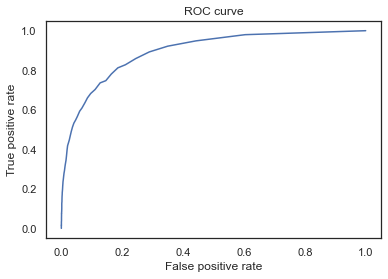

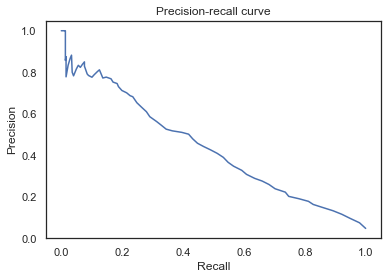

In [133]:
combined_drop = cat_feat_todrop['Features'].tolist() + num_corr_to_drop + ['aki_label']
X_train = train_df_med.drop(columns = combined_drop).values
X_val = val_df_med.drop(columns = combined_drop).values
X_test = test_df_med.drop(columns = combined_drop).values

#Combine train and val sets
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val), axis=0)

rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train_val, y_train_val)

y_score = rf.predict(X_test)
y_pred = rf.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_score))
print(classification_report(y_test, y_score))
fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [134]:
print(np.where(recall>0.5))
print(pr_th[20])
y_pred_02 = y_pred>=0.2
y_pred_02 = y_pred_02.astype(int)
print(confusion_matrix(y_test, y_pred_02))
print(classification_report(y_test, y_pred_02))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)
0.2
[[8721  331]
 [ 218  229]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9052
           1       0.41      0.51      0.45       447

    accuracy                           0.94      9499
   macro avg       0.69      0.74      0.71      9499
weighted avg       0.95      0.94      0.95      9499



In [137]:
feat_df_sel = pd.DataFrame({'Features' : train_df_med.drop(columns = combined_drop).columns, \
                       'Importance' : rf.feature_importances_})
feat_df_sel.sort_values(by='Importance', ascending=False, inplace=True)
feat_df.head(10)

,Features,Importance
34,max_result_creatinine,0.044975
19,min_result_creatinine,0.037736
49,delta_result_creatinine,0.026280
24,max_result_BUN,0.024004
157,Performed,0.022105
9,min_result_BUN,0.021182
39,delta_result_BUN,0.020138
31,max_result_bicarbonate,0.017469
15,min_result_WBC x 1000,0.016963
32,max_result_calcium,0.015519


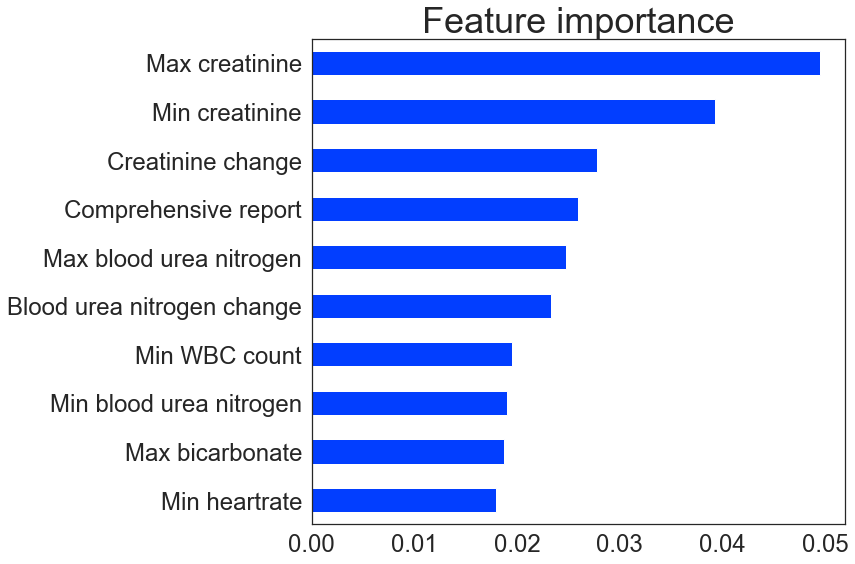

In [180]:
feat_df_sel[:10].sort_values(by='Importance', ascending=True).plot.barh(y='Importance', \
                                                                        x='Features', \
                                                                        legend=None, figsize=(12,8))
plt.title('Feature importance', fontsize=36)
#plt.xlabel('Importance', fontsize=32)
plt.yticks(np.arange(10), ['Min heartrate',  'Max bicarbonate', 'Min blood urea nitrogen',\
                           'Min WBC count', 'Blood urea nitrogen change', \
                           'Max blood urea nitrogen', 'Comprehensive report', \
                           'Creatinine change', 'Min creatinine', 'Max creatinine'])
plt.ylabel(None)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.savefig('../images/feat_imp.png')

In [152]:
per_sum = train_df_med.groupby('aki_label')['Performed'].sum()
per_sum = per_sum/per_sum.sum()
per_sum

aki_label
0    0.90549
1    0.09451
Name: Performed, dtype: float64

aki_label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

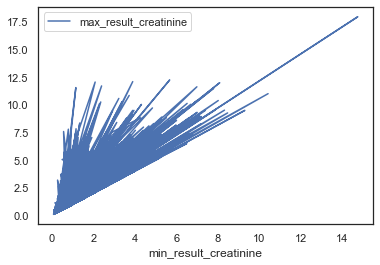

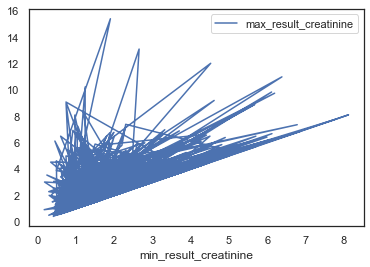

In [139]:
import seaborn as sns
train_df_med.plot(x='min_result_creatinine', y='max_result_creatinine')

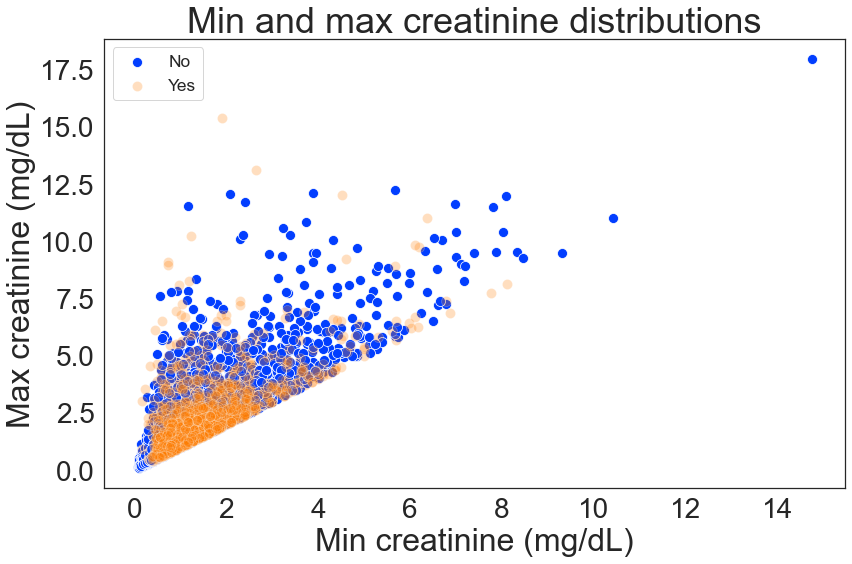

In [243]:
#import seaborn as sns
#sns.set_palette("bright")
#train_df_med.loc[train_df_med['aki_label']==0, 'kidney injury' ]= 'No'
#train_df_med.loc[train_df_med['aki_label']==1, 'kidney injury' ]= 'Yes'
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x='min_result_creatinine', y='max_result_creatinine', \
                data=train_df_med[train_df_med['kidney injury']=='No'], s=100, alpha=1, label='No')
ax = sns.scatterplot(x='min_result_creatinine', y='max_result_creatinine', \
                data=train_df_med[train_df_med['kidney injury']=='Yes'], s=100, alpha=0.25, ax=ax, label='Yes')

              #  sns.scatterplot(x='min_result_creatinine', y='max_result_creatinine', hue='kidney injury', data=train_df_med, s=100,\
              #  hue_order = ['No', 'Yes'])
plt.legend(fontsize='x-large', title_fontsize='40')
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel('Min creatinine (mg/dL)', fontsize=32)
plt.ylabel('Max creatinine (mg/dL)', fontsize=32)
plt.title('Min and max creatinine distributions', fontsize=36);
plt.tight_layout()
plt.savefig('../images/min_max_cr.png')

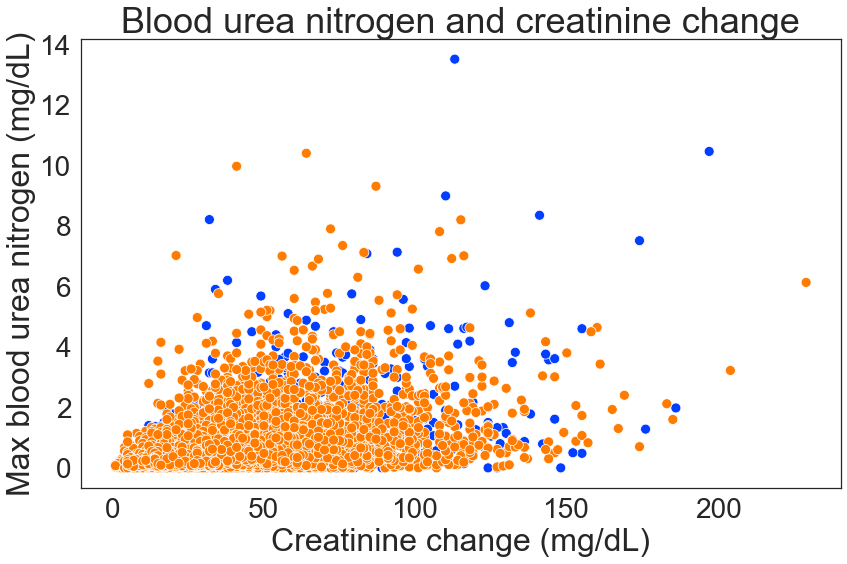

In [173]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x='max_result_BUN', y='delta_result_creatinine', hue='kidney injury',\
                data=train_df_med, legend=None, s=100)
plt.xlabel('Creatinine change (mg/dL)', fontsize=32)
plt.ylabel('Max blood urea nitrogen (mg/dL)', fontsize=32)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.title('Blood urea nitrogen and creatinine change', fontsize=36);
plt.tight_layout()
plt.savefig('../images/cr_bun.png')

In [202]:
y_rand = np.zeros(9499)
y_rand[:447] = 1
np.random.shuffle(y_rand)
precision_r, recall_r, pr_th_r = precision_recall_curve(y_test, y_rand)

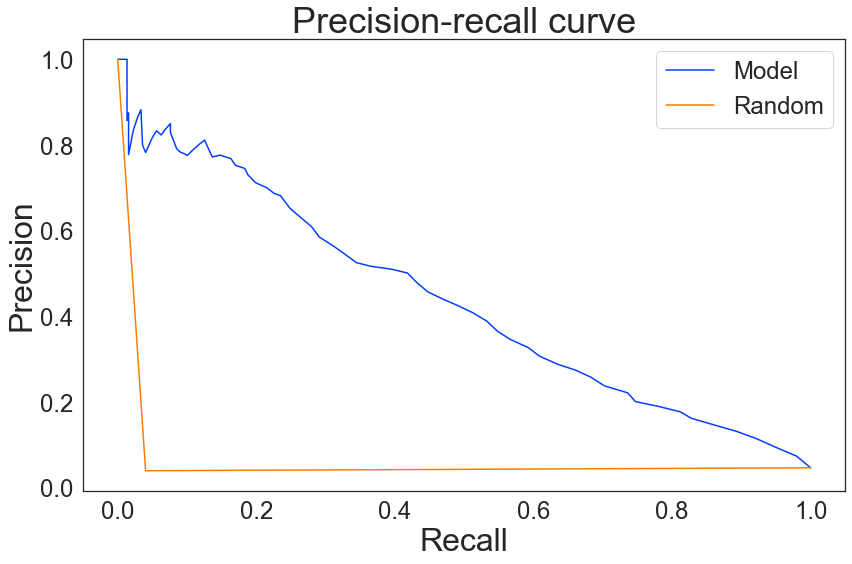

In [205]:
plt.figure(figsize=(12,8))
plt.plot(recall, precision, label='Model')
plt.plot(recall_r, precision_r, label='Random')
plt.xlabel('Recall', fontsize=32)
plt.ylabel('Precision', fontsize=32)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
plt.title('Precision-recall curve', fontsize=36)
plt.tight_layout()
plt.savefig('../images/pr_curve.png')
plt.show()

In [204]:
aps = average_precision_score(y_test, y_pred)
aps_r = average_precision_score(y_test, y_rand)
aps/aps_r

9.168138836823438

In [206]:
import pickle
filename = '../models/rf_06172020.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [209]:
test_df_med_pred = pd.concat([test_df_med, pd.Series(y_test), pd.Series(y_pred), pd.Series(y_pred_02)], \
                             ignore_index=True, axis=1)
test_df_med_pred

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.61,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.01,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.24,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.06,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352065,94.0,98.0,96.0,91.0,122.0,91.0,20.0,26.4,20.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3352092,97.0,100.0,100.0,42.0,80.0,42.0,14.0,26.0,14.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3352124,96.0,100.0,98.0,94.0,130.0,94.0,16.0,42.0,16.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3352294,95.0,99.0,98.0,72.0,99.0,72.0,16.0,31.0,16.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [216]:
y_pred_df = pd.Series(y_pred, index=test_df.index)
y_test_df = pd.Series(y_test, index=test_df.index)
y_pred_02_df = pd.Series(y_pred_02, index=test_df.index)
test_df_med_pred = pd.concat([test_df_med, y_test_df, y_pred_df, y_pred_02_df], axis=1)
test_df_med_pred.columns = test_df.columns.tolist() + ['y_test', 'y_pred', 'y_pred_02']
test_df_med_pred.head()

,min_sao2,max_sao2,mean_sao2,min_heartrate,max_heartrate,mean_heartrate,min_respiration,max_respiration,mean_respiration,min_result_BUN,...,unknown pacer,uterus,varices,vasculitis,ventricular ectopy,ventricular fibrillation,ventricular tachycardia,y_test,y_pred,y_pred_02
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
149913,95.0,100.0,98.0,68.0,88.0,68.0,20.0,27.0,20.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.61,1
152518,95.0,99.0,96.0,64.0,98.0,64.0,15.0,24.0,15.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.01,0
155653,98.0,100.0,99.0,64.0,78.0,64.0,9.0,20.0,9.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.24,1
157260,95.0,100.0,97.0,76.0,118.0,76.0,14.0,25.0,14.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.06,0
161584,94.0,99.0,96.0,81.0,91.0,81.0,16.0,32.5,16.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.19,0


In [235]:
test_subset_pos = test_df_med_pred[(test_df_med_pred['y_test']==1) & (test_df_med_pred['y_pred_02']==1)]
test_subset_pos[['max_result_creatinine', 'min_result_creatinine', 'aki_label', 'y_test', 'y_pred', 'y_pred_02']].sort_values(by='y_pred').tail(20)

,max_result_creatinine,min_result_creatinine,aki_label,y_test,y_pred,y_pred_02
patientunitstayid,,,,,,
1004959,1.30,1.30,1,1,0.57,1
3059098,4.29,3.69,1,1,0.57,1
2870576,1.95,1.95,1,1,0.58,1
1798289,1.80,1.80,1,1,0.58,1
1159279,3.96,3.96,1,1,0.59,1
149913,2.81,2.81,1,1,0.61,1
1526298,9.27,9.27,1,1,0.61,1
931734,2.07,1.69,1,1,0.62,1
1076368,2.50,2.50,1,1,0.62,1


In [ ]:
pat_indices = [1024566, 149913, ]

aki_label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: max_result_creatinine, dtype: object

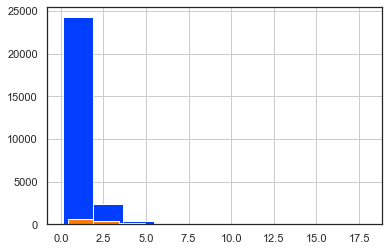

In [223]:
train_df.groupby('aki_label')['max_result_creatinine'].hist()

Text(0.5, 1.0, 'Min and max creatinine levels for both classes')

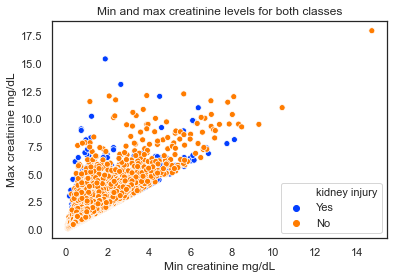

In [224]:
#import seaborn as sns
train_df.loc[train_df['aki_label']==0, 'kidney injury' ]= 'No'
train_df.loc[train_df['aki_label']==1, 'kidney injury' ]= 'Yes'

sns.scatterplot(x='min_result_creatinine', y='max_result_creatinine', hue='kidney injury', data=train_df, alpha=0.1)
plt.xlabel('Min creatinine mg/dL')
plt.ylabel('Max creatinine mg/dL')
plt.title('Min and max creatinine levels for both classes')

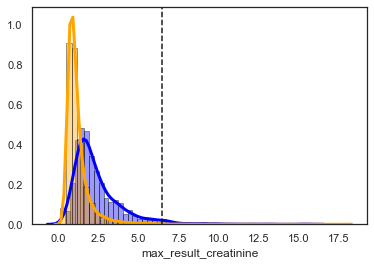

In [233]:
sns.distplot(train_df_med[train_df_med['aki_label']==1]['max_result_creatinine'], hist=True, kde=True, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.distplot(train_df_med[train_df_med['aki_label']==0]['max_result_creatinine'], hist=True, kde=True, 
             color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.axvline(6.47, ls='--', color='k')

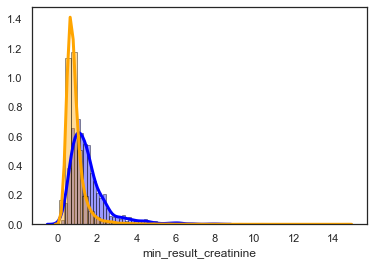

In [229]:
sns.distplot(train_df_med[train_df_med['aki_label']==1]['min_result_creatinine'], hist=True, kde=True, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.distplot(train_df_med[train_df_med['aki_label']==0]['min_result_creatinine'], hist=True, kde=True, 
             color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.axvline(1.00, ls='--', color='k')